In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
dfg = pd.read_csv('wat-out-good-time_router.csv')
dfm = pd.read_csv('wat-out-mal-time_router.csv')

In [13]:
dfg

,time,router,target
0,7,0,1
1,11,1,1
2,15,2,1
3,19,3,1
4,23,7,1
...,...,...,...
245671,3152973,0,1
245672,3152974,0,1
245673,3152975,0,1
245674,3152975,4,1


In [14]:
dfm

,time,router,target
0,7,0,0
1,7,1,0
2,11,5,0
3,11,1,0
4,15,2,0
...,...,...,...
258120,3150824,5,0
258121,3150825,13,0
258122,3150827,1,0
258123,3150828,9,0


In [15]:
df = dfg.append(dfm, ignore_index=True)
df = df.sort_values('time')

In [16]:
df=pd.get_dummies(df, prefix=['router'], columns=['router'])
df.to_csv('wat-time-router-sep.csv',index=False)
df = pd.read_csv("wat-time-router-sep.csv")
df

,time,target,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15
0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503796,3152973,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
503797,3152974,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
503798,3152975,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
503799,3152975,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df.corr()

,time,target,router_0,router_1,router_2,router_3,router_4,router_5,router_6,router_7,router_8,router_9,router_10,router_11,router_12,router_13,router_14,router_15
time,1.000000,0.048453,0.013935,-0.046965,-0.021449,-0.017506,0.025762,-0.016840,0.000311,0.012240,0.029573,-0.001497,0.005343,0.018794,0.019496,0.000030,-0.009027,-0.002346
target,0.048453,1.000000,0.011476,-0.016570,0.000140,0.000489,0.005633,-0.016888,-0.000336,0.001094,0.006725,-0.009808,0.000703,0.001200,0.006661,-0.000812,0.002990,0.002919
router_0,0.013935,0.011476,1.000000,-0.226577,-0.177506,-0.128406,-0.197980,-0.120332,-0.111081,-0.102178,-0.159730,-0.112189,-0.103362,-0.089124,-0.109522,-0.098479,-0.088337,-0.072180
router_1,-0.046965,-0.016570,-0.226577,1.000000,-0.122345,-0.088503,-0.136457,-0.082938,-0.076562,-0.070426,-0.110093,-0.077326,-0.071242,-0.061428,-0.075488,-0.067876,-0.060886,-0.049750
router_2,-0.021449,0.000140,-0.177506,-0.122345,1.000000,-0.069336,-0.106904,-0.064976,-0.059981,-0.055173,-0.086250,-0.060579,-0.055813,-0.048124,-0.059139,-0.053176,-0.047700,-0.038975
router_3,-0.017506,0.000489,-0.128406,-0.088503,-0.069336,1.000000,-0.077333,-0.047003,-0.043389,-0.039912,-0.062392,-0.043822,-0.040374,-0.034813,-0.042780,-0.038467,-0.034505,-0.028194
router_4,0.025762,0.005633,-0.197980,-0.136457,-0.106904,-0.077333,1.000000,-0.072471,-0.066899,-0.061537,-0.096198,-0.067566,-0.062250,-0.053675,-0.065960,-0.059309,-0.053202,-0.043471
router_5,-0.016840,-0.016888,-0.120332,-0.082938,-0.064976,-0.047003,-0.072471,1.000000,-0.040661,-0.037402,-0.058469,-0.041067,-0.037836,-0.032624,-0.040091,-0.036048,-0.032336,-0.026421
router_6,0.000311,-0.000336,-0.111081,-0.076562,-0.059981,-0.043389,-0.066899,-0.040661,1.000000,-0.034527,-0.053974,-0.037909,-0.034927,-0.030116,-0.037008,-0.033277,-0.029850,-0.024390
router_7,0.012240,0.001094,-0.102178,-0.070426,-0.055173,-0.039912,-0.061537,-0.037402,-0.034527,1.000000,-0.049648,-0.034871,-0.032128,-0.027702,-0.034042,-0.030610,-0.027458,-0.022435


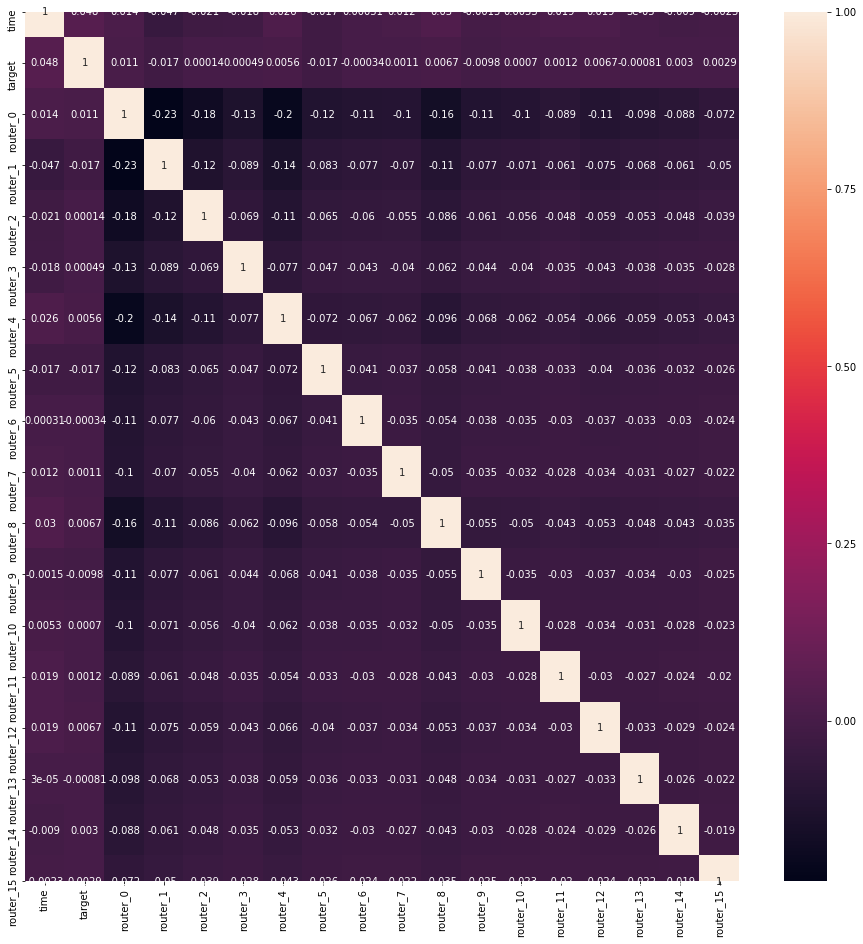

In [18]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [19]:
train_X = df.drop(columns=['target'])

In [20]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503796,0.999998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503797,0.999998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503798,0.999999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503799,0.999999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,target
0,1.000000,0.013935,-0.046965,-0.021449,-0.017506,0.025762,-0.016840,0.000311,0.012240,0.029573,-0.001497,0.005343,0.018794,0.019496,0.000030,-0.009027,-0.002346,0.048453
1,0.013935,1.000000,-0.226577,-0.177506,-0.128406,-0.197980,-0.120332,-0.111081,-0.102178,-0.159730,-0.112189,-0.103362,-0.089124,-0.109522,-0.098479,-0.088337,-0.072180,0.011476
2,-0.046965,-0.226577,1.000000,-0.122345,-0.088503,-0.136457,-0.082938,-0.076562,-0.070426,-0.110093,-0.077326,-0.071242,-0.061428,-0.075488,-0.067876,-0.060886,-0.049750,-0.016570
3,-0.021449,-0.177506,-0.122345,1.000000,-0.069336,-0.106904,-0.064976,-0.059981,-0.055173,-0.086250,-0.060579,-0.055813,-0.048124,-0.059139,-0.053176,-0.047700,-0.038975,0.000140
4,-0.017506,-0.128406,-0.088503,-0.069336,1.000000,-0.077333,-0.047003,-0.043389,-0.039912,-0.062392,-0.043822,-0.040374,-0.034813,-0.042780,-0.038467,-0.034505,-0.028194,0.000489
5,0.025762,-0.197980,-0.136457,-0.106904,-0.077333,1.000000,-0.072471,-0.066899,-0.061537,-0.096198,-0.067566,-0.062250,-0.053675,-0.065960,-0.059309,-0.053202,-0.043471,0.005633
6,-0.016840,-0.120332,-0.082938,-0.064976,-0.047003,-0.072471,1.000000,-0.040661,-0.037402,-0.058469,-0.041067,-0.037836,-0.032624,-0.040091,-0.036048,-0.032336,-0.026421,-0.016888
7,0.000311,-0.111081,-0.076562,-0.059981,-0.043389,-0.066899,-0.040661,1.000000,-0.034527,-0.053974,-0.037909,-0.034927,-0.030116,-0.037008,-0.033277,-0.029850,-0.024390,-0.000336
8,0.012240,-0.102178,-0.070426,-0.055173,-0.039912,-0.061537,-0.037402,-0.034527,1.000000,-0.049648,-0.034871,-0.032128,-0.027702,-0.034042,-0.030610,-0.027458,-0.022435,0.001094
9,0.029573,-0.159730,-0.110093,-0.086250,-0.062392,-0.096198,-0.058469,-0.053974,-0.049648,1.000000,-0.054512,-0.050223,-0.043305,-0.053216,-0.047851,-0.042923,-0.035072,0.006725


In [22]:
train_Y = corr_df['target']

In [23]:
train_Y.value_counts()

0    258125
1    245676
Name: target, dtype: int64

#### machine learning models

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=0)

In [25]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [26]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691314
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.002      
Dependent Variable: target           AIC:              696602.9522
Date:               2020-05-02 09:02 BIC:              696792.1611
No. Observations:   503801           Log-Likelihood:   -3.4828e+05
Df Model:           16               LL-Null:          -3.4905e+05
Df Residuals:       503784           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
0      0.2751      0.0082     33.4012    0.0000     0.2589     0.2912
1     -0.1583      0.0072    -21.9388    

In [27]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.51
Train Prediction Score 51.56212782850338
Test Prediction  51.47709754467682


In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48242 29330]
 [44008 29561]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57     77572
           1       0.50      0.40      0.45     73569

    accuracy                           0.51    151141
   macro avg       0.51      0.51      0.51    151141
weighted avg       0.51      0.51      0.51    151141



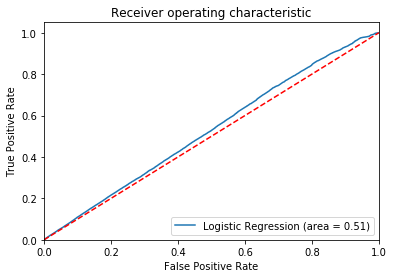

In [31]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred_knn= logreg.predict(X_test)

In [34]:
knn_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 51.56212782850338
Test Prediction  51.47709754467682


In [35]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[48242 29330]
 [44008 29561]]


In [36]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57     77572
           1       0.50      0.40      0.45     73569

    accuracy                           0.51    151141
   macro avg       0.51      0.51      0.51    151141
weighted avg       0.51      0.51      0.51    151141



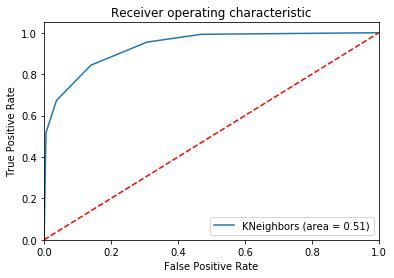

In [37]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [39]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [40]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred_nb= nb.predict(X_test)

In [42]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 51.373277377644186
Test Prediction Score 51.20648930468899


In [43]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[34927 42645]
 [31102 42467]]


In [44]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.53      0.45      0.49     77572
           1       0.50      0.58      0.54     73569

    accuracy                           0.51    151141
   macro avg       0.51      0.51      0.51    151141
weighted avg       0.51      0.51      0.51    151141



In [45]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [46]:
model = Sequential()
n_cols = X_train.shape[1]
n_cols

17

In [47]:
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [49]:
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211596 samples, validate on 141064 samples
Epoch 1/10
211596/211596 [==============================] - 24s 114us/step - loss: 0.6917 - accuracy: 0.5106 - val_loss: 0.6908 - val_accuracy: 0.5117
Epoch 2/10
211596/211596 [==============================] - 25s 117us/step - loss: 0.6907 - accuracy: 0.5123 - val_loss: 0.6903 - val_accuracy: 0.5103
Epoch 3/10
211596/211596 [==============================] - 24s 111us/step - loss: 0.6903 - accuracy: 0.5103 - val_loss: 0.6900 - val_accuracy: 0.5115
Epoch 4/10
211596/211596 [==============================] - 24s 112us/step - loss: 0.6899 - accuracy: 0.5113 - val_loss: 0.6898 - val_accuracy: 0.5108
Epoch 5/10
211596/211596 [==============================] - 22s 105us/step - loss: 0.6898 - accuracy: 0.5097 - val_loss: 0.6897 - val_accuracy: 0.5116
Epoch 6/10
211596/211596 [==============================] - 22s 106us/step - loss: 0.6896 - accuracy: 0.5109 - val_loss: 0.6898 - val_accuracy: 0.5116
Epoch 7/10
211596/211596 [================

In [50]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211596 samples, validate on 141064 samples
Epoch 1/10
211596/211596 [==============================] - 29s 139us/step - loss: 0.6928 - accuracy: 0.5121 - val_loss: 0.6929 - val_accuracy: 0.5116
Epoch 2/10
211596/211596 [==============================] - 26s 125us/step - loss: 0.6925 - accuracy: 0.5126 - val_loss: 0.6920 - val_accuracy: 0.5166
Epoch 3/10
211596/211596 [==============================] - 26s 121us/step - loss: 0.6916 - accuracy: 0.5128 - val_loss: 0.6909 - val_accuracy: 0.5188
Epoch 4/10
211596/211596 [==============================] - 28s 131us/step - loss: 0.6909 - accuracy: 0.5143 - val_loss: 0.6904 - val_accuracy: 0.5146
Epoch 5/10
211596/211596 [==============================] - 27s 127us/step - loss: 0.6904 - accuracy: 0.5135 - val_loss: 0.6897 - val_accuracy: 0.5190
Epoch 6/10
211596/211596 [==============================] - 28s 131us/step - loss: 0.6899 - accuracy: 0.5141 - val_loss: 0.6891 - val_accuracy: 0.5171
Epoch 7/10
211596/211596 [================

In [51]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211596 samples, validate on 141064 samples
Epoch 1/10
211596/211596 [==============================] - 46s 218us/step - loss: 0.6928 - accuracy: 0.5119 - val_loss: 0.6927 - val_accuracy: 0.5115
Epoch 2/10
211596/211596 [==============================] - 27s 129us/step - loss: 0.6926 - accuracy: 0.5131 - val_loss: 0.6925 - val_accuracy: 0.5125
Epoch 3/10
211596/211596 [==============================] - 26s 121us/step - loss: 0.6923 - accuracy: 0.5127 - val_loss: 0.6921 - val_accuracy: 0.5139
Epoch 4/10
211596/211596 [==============================] - 26s 121us/step - loss: 0.6920 - accuracy: 0.5141 - val_loss: 0.6919 - val_accuracy: 0.5122
Epoch 5/10
211596/211596 [==============================] - 26s 123us/step - loss: 0.6918 - accuracy: 0.5127 - val_loss: 0.6915 - val_accuracy: 0.5146
Epoch 6/10
211596/211596 [==============================] - 26s 124us/step - loss: 0.6916 - accuracy: 0.5128 - val_loss: 0.6912 - val_accuracy: 0.5153
Epoch 7/10
211596/211596 [================